___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.model_selection import train_test_split


from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

In [3]:
df0 = pd.read_csv("Ready_to_ML.csv")
df = df0.copy()

In [4]:
df.head()

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,Mercedes-Benz,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.0,Compact,Used,Yes,120200.0,Manual,Diesel,Dealer,1595.0,5.0,98.0,Front,Alloy wheels,1270.0,No,Cloth,2.0,efficient,6.0,75.0,3.800,Standard,Standard,Safety Premium Package
1,Mercedes-Benz EQE 350,Mercedes-Benz,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.0,Compact,Pre-registered,Yes,5000.0,Automatic,Electric,Dealer,1.0,1.0,0.0,4WD,"Alloy wheels (21""), Shift paddles, Sport packa...",2355.0,No,Part/Full Leather,1.0,efficient,0.0,215.0,2.359,Premium,Plus,Safety Premium Package
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.0,Compact,Used,Yes,18900.0,Automatic,Benzine,Dealer,1991.0,8.0,162.0,4WD,Alloy wheels,1555.0,No,Part/Full Leather,2.0,unefficient,2.0,310.0,8.400,Standard,Standard,Safety Premium Plus Package
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.0,Compact,Used,Yes,18995.0,Automatic,Benzine,Dealer,1991.0,7.0,169.0,4WD,Sport seats,1455.0,No,Part/Full Leather,2.0,unefficient,2.0,225.0,7.300,Standard,Standard,Safety Premium Package
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.0,Compact,Used,Yes,197000.0,Automatic,Diesel,Dealer,2143.0,7.0,162.0,4WD,Alloy wheels,1545.0,No,Part/Full Leather,2.0,unefficient,7.0,100.0,4.900,Standard,Standard,Safety Premium Plus Package


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

In [6]:
df.describe()

,price,mileage,engine_size,gears,co_emissions,empty_weight,previous_owner,age,power_kW,cons_avg
count,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000
mean,23537.240538,68863.811928,1708.964696,5.820112,129.525841,1425.205421,1.460073,5.166448,118.414380,5.531746
std,20811.986347,62794.146434,772.439713,1.416920,54.255203,307.386873,0.852665,4.654800,65.642485,2.220290
min,490.000000,0.000000,0.000000,1.000000,0.000000,347.000000,1.000000,0.000000,33.000000,0.000000
25%,12490.000000,19155.000000,1248.000000,5.000000,105.000000,1228.000000,1.000000,2.000000,80.000000,4.300000
50%,18440.000000,54000.000000,1595.000000,6.000000,123.000000,1375.000000,1.000000,4.000000,100.000000,5.200000
75%,28330.000000,100675.000000,1969.000000,6.000000,150.000000,1597.000000,2.000000,7.000000,135.000000,6.400000
max,549000.000000,667128.000000,6300.000000,8.000000,399.000000,3150.000000,9.000000,20.000000,450.000000,18.300000


## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal.

In [7]:
df.duplicated().sum()

1815

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
make_model_count=df.make_model.value_counts()
make_model_count

make_model
Renault Megane              825
SEAT Leon                   757
Dacia Sandero               721
Hyundai i30                 699
Opel Astra                  634
Ford Mustang                572
Peugeot 308                 536
Nissan Qashqai              484
Ford Focus                  483
SEAT Ibiza                  433
Volvo V40                   430
Fiat Tipo                   415
Fiat 500                    413
Renault Clio                404
Ford Fiesta                 392
Nissan Micra                380
Fiat 500X                   373
Skoda Octavia               359
Opel Corsa                  358
Dacia Duster                343
Toyota Yaris                323
Opel Insignia               290
Volvo C70                   281
Peugeot 208                 260
Skoda Fabia                 246
Fiat 500C                   238
Toyota Auris                231
Peugeot RCZ                 220
Hyundai TUCSON              216
Peugeot 3008                215
Ford Kuga                   2

In [11]:
drop_model = make_model_count[make_model_count <= 100].index
drop_model

Index(['Hyundai i10', 'Peugeot 307', 'Fiat 124 Spider', 'Renault Twingo',
       'Fiat 500L', 'Opel Crossland X', 'Renault ZOE', 'Renault Laguna',
       'Mercedes-Benz A 200', 'Skoda Kamiq',
       ...
       'Mercedes-Benz ML 300', 'Dacia Break', 'Toyota Tundra',
       'Mercedes-Benz E 50 AMG', 'Mercedes-Benz CLS 300',
       'Mercedes-Benz S 65 AMG', 'Mercedes-Benz CLK 320', 'Toyota GR86',
       'Toyota Tacoma', 'Renault R 11'],
      dtype='object', name='make_model', length=420)

In [12]:
for i in drop_model:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)
    
df.reset_index(drop=True, inplace=True)

In [13]:
df

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Mercedes-Benz,"Bestel gemakkelijk Online 24/7, 1000 Brussel, BE",24400.0,Compact,Used,Yes,27150.0,Manual,Diesel,Dealer,1461.0,6.0,120.0,Front,"Alloy wheels, Automatically dimming interior m...",1330.0,No,Part/Full Leather,2.0,unefficient,2.0,85.0,4.5,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Mercedes-Benz,"Zaackoer Weg 34, 15926 Luckau, DE",7450.0,Compact,Used,No,157500.0,Manual,Diesel,Dealer,1991.0,6.0,138.0,Front,"Alloy wheels, Automatically dimming interior m...",1295.0,Yes,Cloth,2.0,unefficient,12.0,80.0,5.2,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,Mercedes-Benz,"Calle Carbón 19, 29603 MALAGA, ES",29800.0,Compact,Used,Yes,21734.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,Sport seats,1445.0,No,Cloth,2.0,unefficient,2.0,85.0,3.9,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,Mercedes-Benz,"RUA REAL 60, 36860 PONTEAEREAS, ES",21000.0,Compact,Used,Yes,172700.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,Sport seats,1425.0,No,Cloth,3.0,unefficient,4.0,80.0,3.7,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,Mercedes-Benz,"Canal de Sant Jordi nº17 Pol. Ind. Son oms, 0...",26800.0,Compact,Used,Yes,18989.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,Sport seats,1455.0,No,Cloth,2.0,unefficient,2.0,85.0,3.9,Standard,Standard,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18192,Volvo V40,Volvo,"1000 Brussel, BE",13000.0,Sedan,Used,No,114000.0,Manual,Diesel,Private seller,1969.0,6.0,94.0,Front,"All season tyres, Ambient lighting, Cargo barr...",1532.0,Yes,Cloth,1.0,efficient,4.0,88.0,3.6,Standard,Standard,Safety Premium Package
18193,Volvo S60,Volvo,"CALLE CATALUNYA, 37, 8520 LLERONA, ES",4999.0,Sedan,Used,Yes,166512.0,Manual,Benzine,Dealer,2521.0,5.0,145.0,Front,Alloy wheels,1550.0,No,Part/Full Leather,3.0,efficient,18.0,154.0,9.1,Standard,Standard,Safety Premium Package
18194,Volvo S90,Volvo,"HERMANOS LUMIERE Nº16, 29004 MALAGA, ES",37600.0,Sedan,Used,Yes,40345.0,Automatic,Diesel,Dealer,1969.0,8.0,127.0,4WD,Alloy wheels,2077.0,No,Part/Full Leather,2.0,efficient,3.0,288.0,2.0,Standard,Standard,Safety Premium Plus Package
18195,Volvo C30,Volvo,"Sur rendez-vous, 5060 Sambreville, BE",7300.0,Sedan,Used,Yes,96000.0,Manual,Diesel,Dealer,1560.0,6.0,99.0,Front,"Alloy wheels, Automatically dimming interior m...",1356.0,Yes,Cloth,1.0,unefficient,11.0,84.0,3.8,Standard,Standard,Safety Premium Package


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18197 entries, 0 to 18196
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     18197 non-null  object 
 1   make                           18197 non-null  object 
 2   location                       18197 non-null  object 
 3   price                          18197 non-null  float64
 4   body_type                      18197 non-null  object 
 5   type                           18197 non-null  object 
 6   warranty                       18197 non-null  object 
 7   mileage                        18197 non-null  float64
 8   gearbox                        18197 non-null  object 
 9   fuel_type                      18197 non-null  object 
 10  seller                         18197 non-null  object 
 11  engine_size                    18197 non-null  float64
 12  gears                          18197 non-null 

In [15]:
df.drop(columns=["make", "location"], inplace=True)

In [16]:
df_object = df.select_dtypes(include ="object").head()
df_object

,make_model,body_type,type,warranty,gearbox,fuel_type,seller,drivetrain,extras,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Compact,Used,Yes,Manual,Diesel,Dealer,Front,"Alloy wheels, Automatically dimming interior m...",No,Part/Full Leather,unefficient,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Compact,Used,No,Manual,Diesel,Dealer,Front,"Alloy wheels, Automatically dimming interior m...",Yes,Cloth,unefficient,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,Sport seats,No,Cloth,unefficient,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,Sport seats,No,Cloth,unefficient,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,Sport seats,No,Cloth,unefficient,Standard,Standard,Safety Premium Package


In [17]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

make_model                    : 70
body_type                     : 6
type                          : 4
warranty                      : 2
gearbox                       : 3
fuel_type                     : 4
seller                        : 2
drivetrain                    : 3
extras                        : 6478
full_service_history          : 2
upholstery                    : 2
energy_efficiency_class       : 2
comfort_&_convenience_Package : 3
entertainment_&_media_Package : 2
safety_&_security_Package     : 3


### Converting the Extras feature from object to numeric

In [18]:
df.extras.head(10)

0    Alloy wheels, Automatically dimming interior m...
1    Alloy wheels, Automatically dimming interior m...
2                                          Sport seats
3                                          Sport seats
4                                          Sport seats
5                                          Sport seats
6                                          Sport seats
7                    Alloy wheels (19"), Sport package
8                                         Alloy wheels
9                                          Sport seats
Name: extras, dtype: object

In [19]:
df.extras.iloc[0]

'Alloy wheels, Automatically dimming interior mirror, Spoiler, Sport seats, Voice Control'

In [20]:
df.extras.apply(lambda x: len(x.split(',')))

0        5
1        6
2        1
3        1
4        1
        ..
18192    9
18193    1
18194    1
18195    3
18196    2
Name: extras, Length: 18197, dtype: int64

In [21]:
df["extras"] = df.extras.apply(lambda x: len(x.split(',')))


In [22]:
df.extras.unique()

array([ 5,  6,  1,  2,  8,  7,  3,  4, 12,  9, 11, 10, 15, 13, 14, 16, 18,
       17, 19, 26, 20], dtype=int64)

In [23]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Mercedes-Benz A 180' 'Opel Corsa' 'Opel Astra' 'Opel Adam'
 'Opel Insignia' 'Opel Cascada' 'Opel Grandland X' 'Renault Megane'
 'Renault Clio' 'Renault Captur' 'Renault Talisman' 'Renault Kadjar'
 'Peugeot 308' 'Peugeot 206' 'Peugeot 208' 'Peugeot 207' 'Peugeot 3008'
 'Peugeot 508' 'Peugeot RCZ' 'Peugeot 2008' 'Fiat 500' 'Fiat Tipo'
 'Fiat 500X' 'Fiat Panda' 'Fiat 500C' 'SEAT Leon' 'SEAT Ibiza'
 'SEAT Arona' 'SEAT Ateca' 'Skoda Octavia' 'Skoda Scala' 'Skoda Fabia'
 'Skoda Superb' 'Skoda Kodiaq' 'Skoda Karoq' 'Dacia Sandero' 'Dacia Logan'
 'Dacia Duster' 'Toyota Yaris' 'Toyota Aygo' 'Toyota Corolla'
 'Toyota Auris' 'Toyota C-HR' 'Toyota RAV 4' 'Nissan Micra'
 'Nissan Qashqai' 'Nissan Juke' 'Nissan Pulsar' 'Nissan 370Z'
 'Nissan 350Z' 'Nissan X-Trail' 'Ford Fiesta' 'Ford Focus' 'Ford Mondeo'
 'Ford Kuga' 'Ford Mustang' 'Hyundai i30' 'Hyundai i20' 'Hyundai IONIQ'
 'Hyundai TUCSON' 'Volvo V40' 'Volvo S60' 'Volvo XC60' 'Volvo C30'
 'Volvo C70' 'Volvo XC90' 

## multicollinearity control

In [24]:
df_numeric=df.select_dtypes(include ="number")
df_numeric

,price,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
0,24400.0,27150.0,1461.0,6.0,120.0,5,1330.0,2.0,2.0,85.0,4.5
1,7450.0,157500.0,1991.0,6.0,138.0,6,1295.0,2.0,12.0,80.0,5.2
2,29800.0,21734.0,1461.0,7.0,99.5,1,1445.0,2.0,2.0,85.0,3.9
3,21000.0,172700.0,1461.0,7.0,99.5,1,1425.0,3.0,4.0,80.0,3.7
4,26800.0,18989.0,1461.0,7.0,99.5,1,1455.0,2.0,2.0,85.0,3.9
...,...,...,...,...,...,...,...,...,...,...,...
18192,13000.0,114000.0,1969.0,6.0,94.0,9,1532.0,1.0,4.0,88.0,3.6
18193,4999.0,166512.0,2521.0,5.0,145.0,1,1550.0,3.0,18.0,154.0,9.1
18194,37600.0,40345.0,1969.0,8.0,127.0,1,2077.0,2.0,3.0,288.0,2.0
18195,7300.0,96000.0,1560.0,6.0,99.0,3,1356.0,1.0,11.0,84.0,3.8


<Axes: >

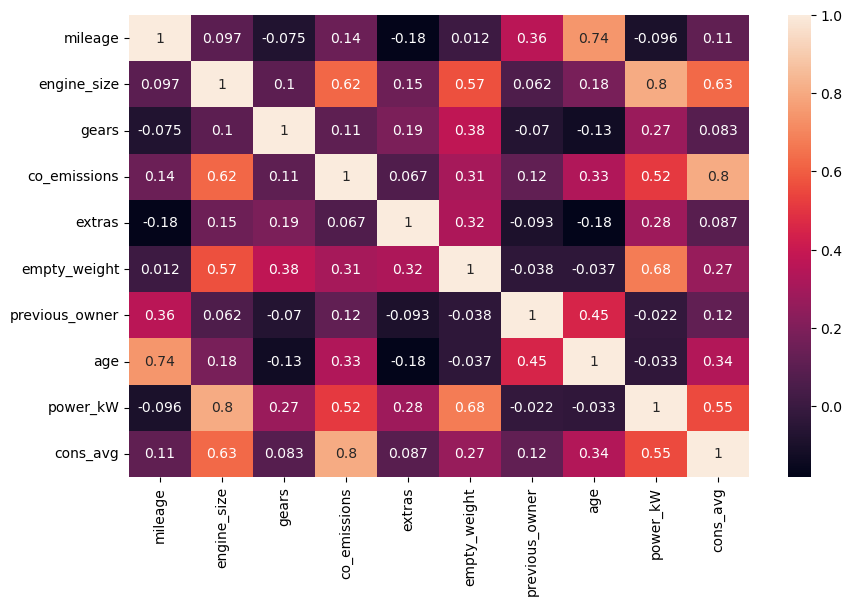

In [25]:
df_numeric = df.select_dtypes(include ="number")
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr().iloc[1:, 1:], annot =True)

In [26]:
df_numeric.corr()[(abs(df_numeric.corr())>= 0.9) & (abs(df_numeric.corr()) < 1)]

,price,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
co_emissions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
empty_weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_owner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_kW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_numeric.corr()[(abs(df_numeric.corr())>= 0.9) & (abs(df_numeric.corr()) < 1)].any()

price             False
mileage           False
engine_size       False
gears             False
co_emissions      False
extras            False
empty_weight      False
previous_owner    False
age               False
power_kW          False
cons_avg          False
dtype: bool

In [28]:
df_numeric.corr()[(abs(df_numeric.corr())>= 0.9) & (abs(df_numeric.corr()) < 1)].any().any()

False

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
X_vif = df_numeric.drop(columns='price')
X_vif.head()

,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
0,27150.0,1461.0,6.0,120.0,5,1330.0,2.0,2.0,85.0,4.5
1,157500.0,1991.0,6.0,138.0,6,1295.0,2.0,12.0,80.0,5.2
2,21734.0,1461.0,7.0,99.5,1,1445.0,2.0,2.0,85.0,3.9
3,172700.0,1461.0,7.0,99.5,1,1425.0,3.0,4.0,80.0,3.7
4,18989.0,1461.0,7.0,99.5,1,1455.0,2.0,2.0,85.0,3.9


In [31]:
df_vif = pd.DataFrame()
df_vif['features'] = X_vif.columns

In [32]:
df_vif

,features
0,mileage
1,engine_size
2,gears
3,co_emissions
4,extras
5,empty_weight
6,previous_owner
7,age
8,power_kW
9,cons_avg


In [33]:
X_vif.head()

,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
0,27150.0,1461.0,6.0,120.0,5,1330.0,2.0,2.0,85.0,4.5
1,157500.0,1991.0,6.0,138.0,6,1295.0,2.0,12.0,80.0,5.2
2,21734.0,1461.0,7.0,99.5,1,1445.0,2.0,2.0,85.0,3.9
3,172700.0,1461.0,7.0,99.5,1,1425.0,3.0,4.0,80.0,3.7
4,18989.0,1461.0,7.0,99.5,1,1455.0,2.0,2.0,85.0,3.9


In [34]:
variance_inflation_factor(X_vif.values, 0)

5.471118337441996

In [35]:
df_vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

In [36]:
df_vif

,features,VIF
0,mileage,5.471118
1,engine_size,25.196104
2,gears,21.675253
3,co_emissions,23.504770
4,extras,2.780753
5,empty_weight,38.757802
6,previous_owner,4.798746
7,age,6.879670
8,power_kW,17.867896
9,cons_avg,24.705654


## Outliers in Price Column

<Axes: ylabel='price'>

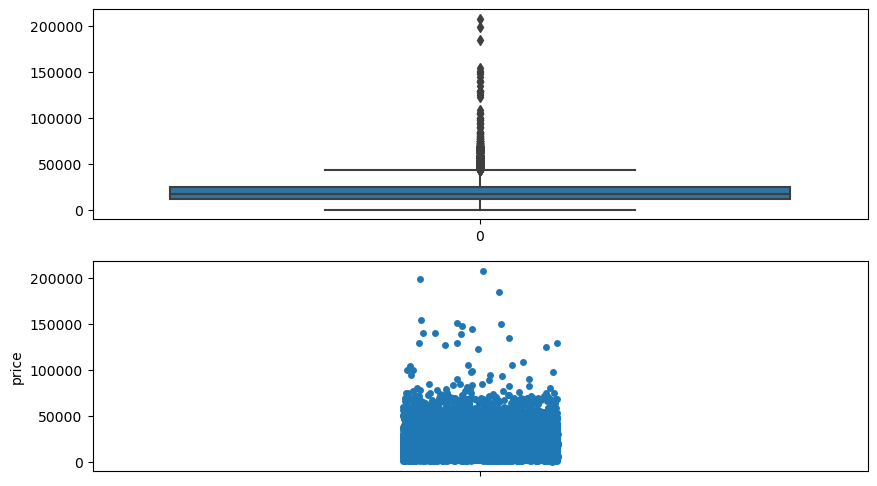

In [37]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.price)

plt.subplot(212)
sns.stripplot(df.price)

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [38]:
X= df.drop(columns="price")
y= df.price

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")

# OneHotEncoder converts categorical features into dummies (0 and 1). If we want our model to treat all unique values ​​under the categorical feature equally,
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.
# We could also use the get_dummies() function for this conversion, but since applying get_dummies() to all data and then separating the data into train and test sets will cause data leakege,
# categorical observations for the data we prepared for ML models must be converted into dummies features with the onehotencoder conversion algorithm.
# However, when converting to categorical data, the following should not be forgotten: if there is a hierarchical superiority or ranking (expensive,
# normal, cheap or Large, average, small, etc.) among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used.
# We will talk about this algorithm when it takes place. Conversion of categorical data to dummies features is done according to the unique categorical data in the train set where the fit process is performed.
# With the handle_unknown = "ignore" parameter, all categorical data passed in the test set and not in the train set are converted to 0. The default of this parameter is handle_unknown = "error".
# If the handle_unknown parameter remains at its default value, the onehotencoder algorithm will fail for an observation that is in the test set but not in the train set.

### Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder

In [41]:
df.select_dtypes(include="object").head(1)

,make_model,body_type,type,warranty,gearbox,fuel_type,seller,drivetrain,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Compact,Used,Yes,Manual,Diesel,Dealer,Front,No,Part/Full Leather,unefficient,Standard,Plus,Safety Premium Package


In [42]:
cat_onehot  = ['make_model', 'body_type', 'gearbox', 'fuel_type', 'drivetrain']

cat_ordinal = ['type', 'warranty', 'seller', 'full_service_history', 'upholstery', 'energy_efficiency_class', 'comfort_&_convenience_Package',
               'entertainment_&_media_Package', 'safety_&_security_Package']
    
cat_for_type=["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_warranty=["No", "Yes"]
cat_for_seller=['Dealer', 'Private seller']
cat_for_service_history=["No", "Yes"]
cat_for_upholstery=['Cloth','Part/Full Leather']
cat_for_energy=['unefficient', 'efficient']
cat_for_comfort=['Standard', 'Premium', 'Premium Plus']
cat_for_ent=['Standard', 'Plus']
cat_for_safety=['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [43]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", 
                                       sparse_output=False), cat_onehot), 
                        (OrdinalEncoder(handle_unknown="use_encoded_value",
                                        unknown_value=-1,
                                        categories=[cat_for_type, 
                                                    cat_for_warranty,
                                                    cat_for_seller,
                                                    cat_for_service_history,
                                                    cat_for_upholstery,
                                                    cat_for_energy,
                                                    cat_for_comfort, 
                                                    cat_for_ent, 
                                                    cat_for_safety]), cat_ordinal),
                         remainder='passthrough', 
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

In [44]:
X_train.head()

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
16734,Volvo V40,Compact,Used,Yes,98027.0,Automatic,Diesel,Dealer,1560.0,6.0,89.0,Front,1,1472.0,No,Part/Full Leather,3.0,efficient,7.0,84.0,3.9,Standard,Standard,Safety Premium Package
14781,Ford Mondeo,Station wagon,Used,Yes,17195.0,Automatic,Diesel,Dealer,1995.0,8.0,136.0,4WD,7,1826.0,Yes,Part/Full Leather,1.0,efficient,1.0,140.0,5.2,Premium,Plus,Safety Premium Package
2414,Renault Megane,Coupe,Used,No,225000.0,Manual,Benzine,Private seller,1998.0,6.0,178.0,Front,6,1395.0,No,Part/Full Leather,1.0,efficient,13.0,132.0,7.6,Standard,Standard,Safety Premium Package
1430,Opel Astra,Sedan,Used,No,62807.0,Automatic,Benzine,Dealer,1364.0,8.0,157.0,Front,4,1280.0,Yes,Cloth,4.0,efficient,8.0,103.0,6.7,Premium,Standard,Safety Premium Package
1512,Opel Adam,Sedan,Used,Yes,60750.0,Manual,Benzine,Dealer,1398.0,5.0,0.0,Front,9,1120.0,Yes,Cloth,1.0,unefficient,3.0,74.0,0.0,Premium,Plus,Safety Premium Package


In [45]:
X_test.head()

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
15071,Ford Focus,Sedan,Used,Yes,27532.0,Manual,Diesel,Dealer,1500.0,6.0,109.0,Front,8,1280.0,No,Cloth,1.0,efficient,2.0,88.0,3.60,Premium,Plus,Safety Premium Package
10999,Toyota Aygo,Compact,Used,Yes,31167.0,Manual,Benzine,Dealer,998.0,5.0,93.0,Front,4,985.0,No,Cloth,1.0,efficient,2.0,53.0,4.00,Standard,Plus,Safety Premium Package
14000,Ford Mustang,Convertible,Used,No,33800.0,Automatic,Benzine,Private seller,5083.0,6.0,273.0,Rear,9,1893.0,Yes,Part/Full Leather,1.0,unefficient,4.0,310.0,12.50,Standard,Plus,Safety Premium Package
15766,Hyundai TUCSON,Off-Road/Pick-up,Used,Yes,34850.0,Automatic,Diesel,Dealer,1600.0,6.0,129.0,Front,1,1425.0,No,Cloth,1.0,unefficient,4.0,100.0,4.65,Standard,Standard,Safety Premium Package
4291,Peugeot 3008,Off-Road/Pick-up,Used,No,57430.0,Automatic,Diesel,Dealer,1997.0,8.0,129.0,Front,15,1555.0,Yes,Part/Full Leather,1.0,efficient,3.0,132.0,4.90,Premium,Plus,Safety Premium Package


In [46]:
X_train.shape, X_test.shape

((14557, 24), (3640, 24))

In [47]:
column_trans.fit_transform(X_train)

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
16734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,98027.0,1560.0,6.0,89.0,1,1472.0,3.0,7.0,84.0,3.9
14781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,17195.0,1995.0,8.0,136.0,7,1826.0,1.0,1.0,140.0,5.2
2414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,225000.0,1998.0,6.0,178.0,6,1395.0,1.0,13.0,132.0,7.6
1430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,62807.0,1364.0,8.0,157.0,4,1280.0,4.0,8.0,103.0,6.7
1512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [48]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

In [49]:
X_train_trans.shape, X_test_trans.shape

((14557, 105), (3640, 105))

In [50]:
X_train_trans.head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
16734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,98027.0,1560.0,6.0,89.0,1,1472.0,3.0,7.0,84.0,3.9
14781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,17195.0,1995.0,8.0,136.0,7,1826.0,1.0,1.0,140.0,5.2
2414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,225000.0,1998.0,6.0,178.0,6,1395.0,1.0,13.0,132.0,7.6
1430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,62807.0,1364.0,8.0,157.0,4,1280.0,4.0,8.0,103.0,6.7
1512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [51]:
X_test_trans.head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
15071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,27532.0,1500.0,6.0,109.0,8,1280.0,1.0,2.0,88.0,3.60
10999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,31167.0,998.0,5.0,93.0,4,985.0,1.0,2.0,53.0,4.00
14000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,33800.0,5083.0,6.0,273.0,9,1893.0,1.0,4.0,310.0,12.50
15766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34850.0,1600.0,6.0,129.0,1,1425.0,1.0,4.0,100.0,4.65
4291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [52]:
X_train_trans.join(y_train).corr()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg,price
make_model_Dacia Duster,1.000000,-0.014201,-0.027729,-0.020825,-0.016067,-0.020054,-0.011264,-0.021022,-0.020792,-0.022968,-0.015338,-0.013072,-0.025390,-0.010904,-0.015072,-0.013325,-0.027420,-0.011264,-0.011264,-0.012282,-0.010532,-0.020020,-0.011145,-0.023148,-0.011498,-0.011145,-0.026582,-0.011840,-0.019466,-0.011784,-0.017478,-0.012228,-0.011840,-0.012814,-0.016523,-0.014938,-0.024148,-0.013963,-0.014938,-0.013123,-0.020627,-0.011784,-0.030056,-0.012228,-0.013072,-0.013915,-0.021282,-0.028464,-0.016109,-0.012118,-0.012336,-0.019745,-0.014059,-0.014528,-0.015425,-0.010843,-0.012228,-0.013623,-0.010405,-0.018825,-0.011440,-0.017555,-0.011498,-0.010595,-0.021347,-0.012604,-0.010720,-0.010720,-0.014528,-0.010781,-0.071337,-0.044219,-0.045523,0.262350,-0.070279,-0.042891,-0.081859,0.082212,-0.005378,-0.078694,0.060313,-0.007073,0.075885,0.035014,-0.012534,-0.028480,0.008229,0.012759,-0.033755,-0.042462,-0.044267,-0.114564,0.024047,-0.045589,0.019651,-0.028552,-0.045787,0.010401,0.001350,-0.055951,-0.031392,-0.044283,-0.043849,-0.060263,-0.012768,-0.038572
make_model_Dacia Logan,-0.014201,1.000000,-0.020604,-0.015474,-0.011938,-0.014901,-0.008370,-0.015620,-0.015449,-0.017066,-0.011397,-0.009713,-0.018866,-0.008102,-0.011199,-0.009901,-0.020374,-0.008370,-0.008370,-0.009126,-0.007826,-0.014875,-0.008281,-0.017200,-0.008543,-0.008281,-0.019751,-0.008798,-0.014464,-0.008756,-0.012986,-0.009086,-0.008798,-0.009521,-0.012277,-0.011100,-0.017943,-0.010375,-0.011100,-0.009751,-0.015326,-0.008756,-0.022333,-0.009086,-0.009713,-0.010339,-0.015814,-0.021150,-0.011969,-0.009004,-0.009166,-0.014671,-0.010446,-0.010795,-0.011462,-0.008057,-0.009086,-0.010123,-0.007731,-0.013988,-0.008500,-0.013044,-0.008543,-0.007872,-0.015862,-0.009365,-0.007965,-0.007965,-0.010795,-0.00801

## Scaling

In [53]:
scaler = MinMaxScaler().set_output(transform="pandas")

X_train_scaled = scaler.fit_transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [54]:
X_train_scaled.head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
16734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.5,0.163378,0.268410,0.714286,0.223058,0.000000,0.370753,0.250,0.35,0.109043,0.213115
14781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.5,1.0,0.5,0.028658,0.343255,1.000000,0.340852,0.315789,0.545052,0.000,0.05,0.257979,0.284153
2414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.375000,0.343772,0.714286,0.446115,0.263158,0.332841,0.000,0.65,0.236702,0.415301
1430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5,0.0,0.5,0.10467

In [55]:
X_test_scaled.head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
15071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.5,1.0,0.5,0.045887,0.258087,0.714286,0.273183,0.368421,0.276219,0.0,0.10,0.119681,0.196721
10999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5,0.051945,0.171714,0.571429,0.233083,0.157895,0.130970,0.0,0.10,0.026596,0.218579
14000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.5,0.056333,0.874570,0.714286,0.684211,0.421053,0.578040,0.0,0.20,0.710106,0.683060
15766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.058083,0.

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [56]:
# Pre-defined functions

def train_val(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)

def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


In [57]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [58]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,8.312464e-01,8.304436e-01
mae,2.854532e+03,2.813166e+03
mse,2.713050e+07,2.456726e+07
rmse,5.208694e+03,4.956538e+03


In [59]:
pd.options.display.float_format = '{:.3f}'.format

train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.831,0.830
mae,2854.532,2813.166
mse,27130496.571,24567264.054
rmse,5208.694,4956.538


## Cross Validate

In [60]:
model = LinearRegression()

scores = cross_validate(model, 
                        X_train_scaled, 
                        y_train, 
                        scoring=['r2', 
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'], 
                        cv =10,
                        return_train_score=True) # return_indices=True (for sklearn >= 1.3)
                                


In [61]:
scores_df=pd.DataFrame(scores)
scores_df.mean()[2:]

test_r2                                            0.831
train_r2                                           0.831
test_neg_mean_absolute_error                   -2880.838
train_neg_mean_absolute_error                  -2859.111
test_neg_mean_squared_error                -27574959.819
train_neg_mean_squared_error               -27157477.066
test_neg_root_mean_squared_error               -5205.583
train_neg_root_mean_squared_error              -5210.648
test_neg_mean_absolute_percentage_error           -0.203
train_neg_mean_absolute_percentage_error          -0.202
dtype: float64

In [62]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.831,0.830
mae,2854.532,2813.166
mse,27130496.571,24567264.054
rmse,5208.694,4956.538


## Prediction Error

In [63]:
conda install -c districtdatalabs yellowbrick

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.5.0




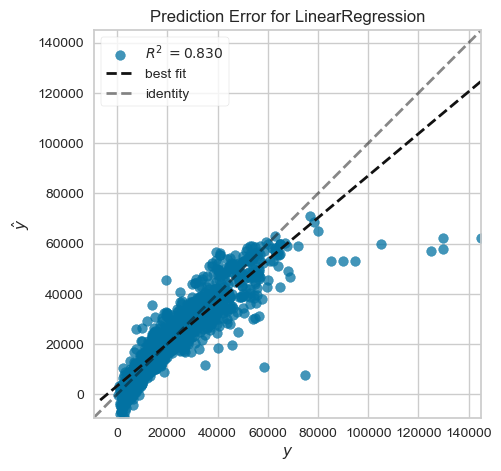

In [65]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();


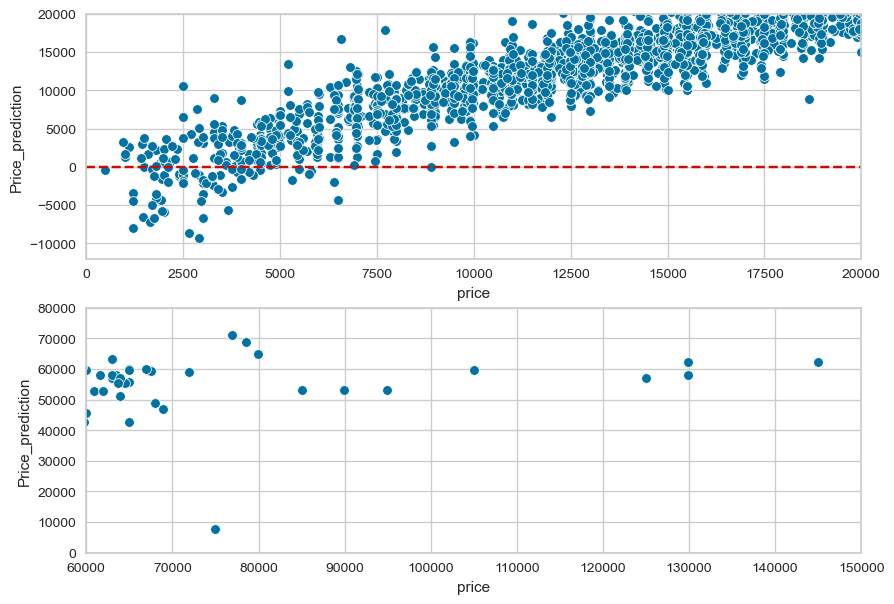

In [66]:
y_pred=lm.predict(X_test_scaled)


plt.figure(figsize=(10,7))
plt.subplot(211)

sns.scatterplot(x = y_test, y = y_pred) 
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("Price_prediction")
plt.xlim([0,20000])
plt.ylim([-12000,20000])

plt.subplot(212)

sns.scatterplot(x = y_test, y = y_pred)
plt.ylabel("Price_prediction")
plt.xlim([60000, 150000])
plt.ylim([0,80000])
plt.show();

## Residual Plot

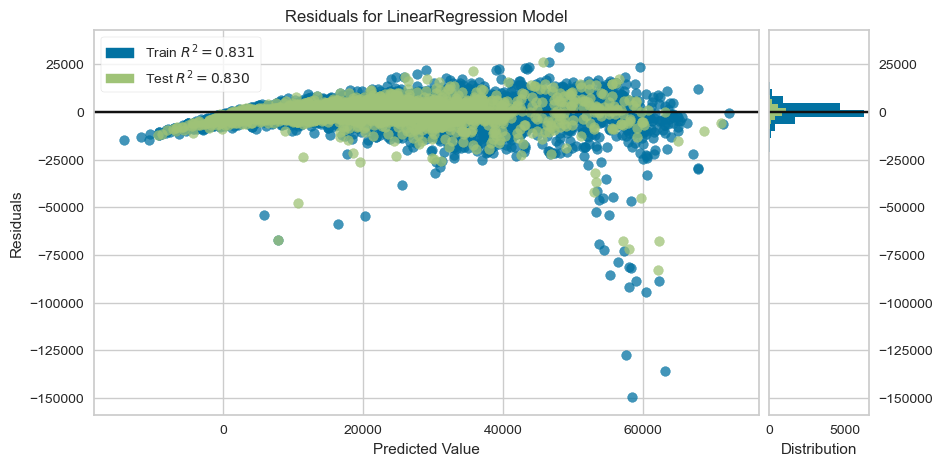

In [67]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show(); 


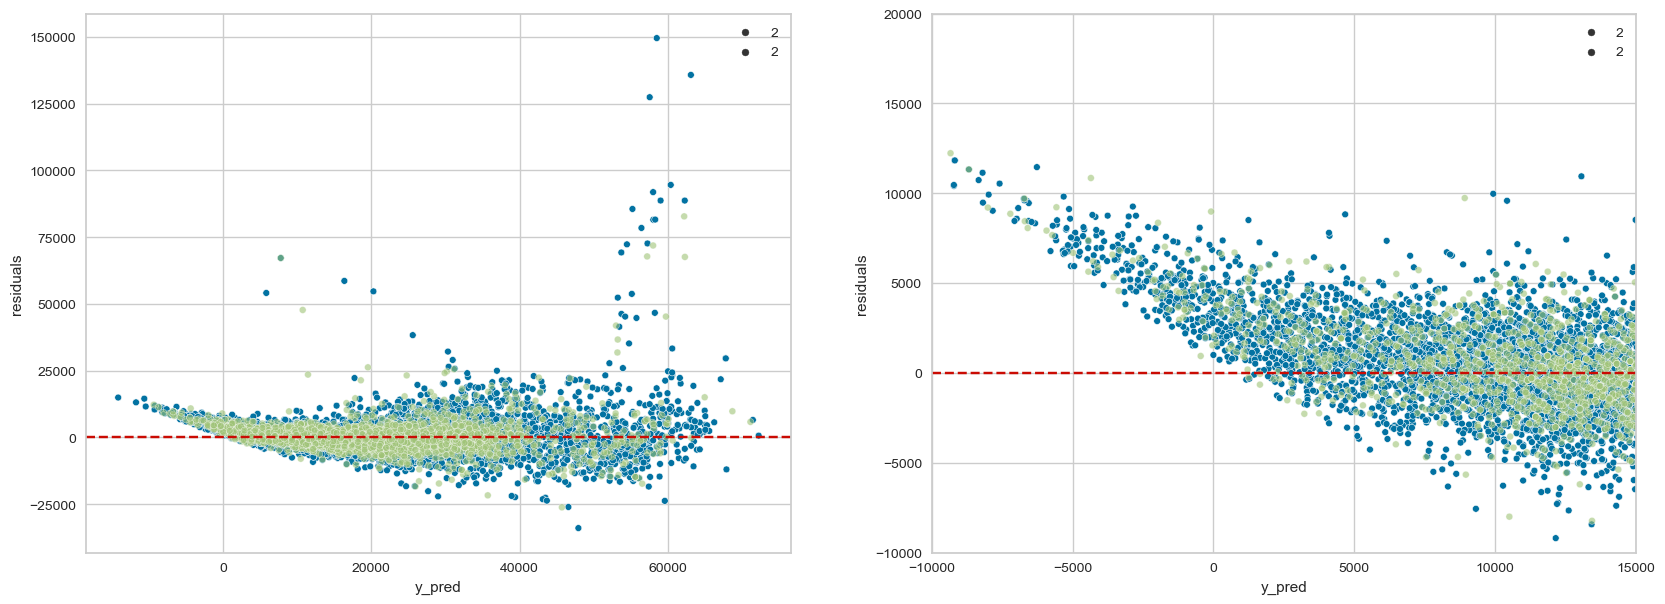

In [68]:
y_pred=lm.predict(X_test_scaled)
y_pred_train = lm.predict(X_train_scaled)

residual_test = y_test-y_pred
residual_train = y_train-y_pred_train

plt.figure(figsize=(20,7))
plt.subplot(121)

sns.scatterplot(x = y_pred_train, y = residual_train, color="b", size=2)
sns.scatterplot(x = y_pred, y = residual_test, color="g", size=2, alpha=0.6)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")

plt.subplot(122)

sns.scatterplot(x = y_pred_train, y = residual_train, color="b", size=2)
sns.scatterplot(x = y_pred, y = residual_test, color="g", size=2, alpha=0.6)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")
plt.xlim([-10000,15000])
plt.ylim([-10000,20000])
plt.show();


## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

In [69]:
df = df[(df.price > 7500)&(df.price <70000)]
df

,make_model,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,24400.000,Compact,Used,Yes,27150.000,Manual,Diesel,Dealer,1461.000,6.000,120.000,Front,5,1330.000,No,Part/Full Leather,2.000,unefficient,2.000,85.000,4.500,Standard,Plus,Safety Premium Package
2,Mercedes-Benz A 180,29800.000,Compact,Used,Yes,21734.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1445.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,21000.000,Compact,Used,Yes,172700.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1425.000,No,Cloth,3.000,unefficient,4.000,80.000,3.700,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,26800.000,Compact,Used,Yes,18989.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1455.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
5,Mercedes-Benz A 180,32900.000,Compact,Pre-registered,Yes,25.000,Manual,Benzine,Dealer,1332.000,6.000,126.000,Front,1,1350.000,No,Cloth,1.000,unefficient,1.000,100.000,0.000,Standard,Standard,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18190,Volvo S90,27190.000,Sedan,Used,Yes,93757.000,Automatic,Diesel,Dealer,1969.000,8.000,127.000,Front,1,1683.000,No,Part/Full Leather,1.000,efficient,4.000,140.000,4.400,Standard,Standard,Safety Premium Plus Package
18191,Volvo S90,27190.000,Sedan,Used,Yes,93757.000,Automatic,Diesel,Dealer,1969.000,8.000,127.000,Front,1,1683.000,No,Part/Full Leather,1.000,efficient,4.000,140.000,4.400,Standard,Standard,Safety Premium Plus Package
18192,Volvo V40,13000.000,Sedan,Used,No,114000.000,Manual,Diesel,Private seller,1969.000,6.000,94.000,Front,9,1532.000,Yes,Cloth,1.000,efficient,4.000,88.000,3.600,Standard,Standard,Safety Premium Package
18194,Volvo S90,37600.000,Sedan,Used,Yes,40345.000,Automatic,Diesel,Dealer,1969.000,8.000,127.000,4WD,1,2077.000,No,Part/Full Leather,2.000,efficient,3.000,288.000,2.000,Standard,Standard,Safety Premium Plus Package


In [70]:
X = df.drop(columns = "price")
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
X_train_trans= column_trans.fit_transform(X_train)
X_test_trans= column_trans.transform(X_test)

In [72]:
X_train_trans.head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
7674,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000,35977.000,1984.000,7.000,172.000,5,1476.000,1.000,3.000,213.000,6.500
13227,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,74314.000,1461.000,5.000,107.000,7,1153.000,1.000,4.000,66.000,4.100
8532,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000

In [73]:
X_test_trans.head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
5621,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,1.000,40085.000,875.000,5.000,90.000,5,1045.000,2.000,4.000,63.000,3.800
14584,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,3.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,160.000,1496.000,6.000,119.000,7,1680.000,1.000,1.000,110.000,5.500
8666,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.0

In [74]:
scaler = MinMaxScaler().set_output(transform="pandas")

X_train_scaled = scaler.fit_transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [75]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

LinearRegression()

In [76]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.879,0.876
mae,2584.201,2498.880
mse,14181595.731,13496452.032
rmse,3765.846,3673.752


In [77]:
model = LinearRegression()

scores = cross_validate(model, 
                        X_train_scaled, 
                        y_train, 
                        scoring=['r2', 
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'], 
                        cv =10,
                        return_train_score=True)

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                            0.874
train_r2                                           0.877
test_neg_mean_absolute_error                   -2637.547
train_neg_mean_absolute_error                  -2607.378
test_neg_mean_squared_error                -14803528.171
train_neg_mean_squared_error               -14422103.938
test_neg_root_mean_squared_error               -3841.829
train_neg_root_mean_squared_error              -3797.502
test_neg_mean_absolute_percentage_error           -0.134
train_neg_mean_absolute_percentage_error          -0.132
dtype: float64

In [78]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lm_mape= mean_absolute_percentage_error(y_test, y_pred)


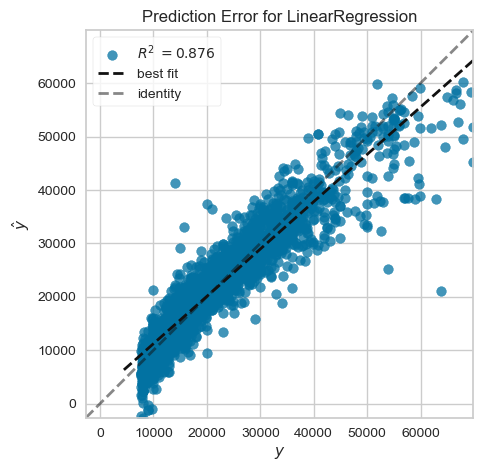

In [79]:
visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();


## Pipeline
- Read the documentation and apply pipeline
- link : https://scikit-learn.org/stable/modules/compose.html

In [80]:
X = df.drop(columns = ["price"])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
X_train.head()

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
7674,SEAT Leon,Station wagon,Used,No,35977.000,Automatic,Benzine,Dealer,1984.000,7.000,172.000,Front,5,1476.000,Yes,Part/Full Leather,1.000,efficient,3.000,213.000,6.500,Standard,Plus,Safety Premium Package
13227,Nissan Micra,Sedan,Used,Yes,74314.000,Manual,Diesel,Dealer,1461.000,5.000,107.000,Front,7,1153.000,Yes,Cloth,1.000,efficient,4.000,66.000,4.100,Premium,Plus,Safety Premium Package
8532,Skoda Octavia,Compact,Used,Yes,39563.000,Automatic,Benzine,Dealer,999.000,7.000,128.000,Front,1,1247.000,No,Cloth,1.000,efficient,3.000,85.000,4.700,Standard,Standard,Safety Premium Plus Package
4458,Peugeot 508,Off-Road/Pick-up,Used,Yes,80300.000,Automatic,Diesel,Dealer,1997.000,6.000,100.000,4WD,2,1845.000,No,Part/Full Leather,2.000,efficient,5.000,147.000,4.000,Standard,Standard,Safety Premium Package
15437,Hyundai i30,Compact,Used,Yes,24576.000,Manual,Benzine,Dealer,1591.000,6.000,137.000,Front,1,1196.000,No,Cloth,1.000,unefficient,6.000,100.000,5.000,Standard,Standard,Safety Standard Package


In [82]:
cat_onehot  = ['make_model', 'body_type', 'gearbox', 'fuel_type', 'drivetrain']

cat_ordinal = ['type', 'warranty', 'seller', 'full_service_history', 'upholstery', 'energy_efficiency_class', 'comfort_&_convenience_Package',
               'entertainment_&_media_Package', 'safety_&_security_Package']
    
cat_for_type=["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_warranty=["No", "Yes"]
cat_for_seller=['Dealer', 'Private seller']
cat_for_service_history=["No", "Yes"]
cat_for_upholstery=['Cloth','Part/Full Leather']
cat_for_energy=['unefficient', 'efficient']
cat_for_comfort=['Standard', 'Premium', 'Premium Plus']
cat_for_ent=['Standard', 'Plus']
cat_for_safety=['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [83]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc_ordinal = OrdinalEncoder(categories=[cat_for_type,
                                         cat_for_warranty,
                                         cat_for_seller,
                                         cat_for_service_history,
                                         cat_for_upholstery,
                                         cat_for_energy,
                                         cat_for_comfort, 
                                         cat_for_ent, 
                                         cat_for_safety])
                                                    

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False) 

In [84]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_pipe = Pipeline(steps=operations).set_output(transform="pandas")

ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

## 4. Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

## Ridge

In [85]:
from sklearn.linear_model import Ridge

In [86]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [87]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.880,0.876
mae,2580.596,2494.098
mse,14151069.131,13451574.795
rmse,3761.791,3667.639


## Cross Validation

In [88]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv=10, 
                        return_train_score=True)

In [89]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.054,0.012,0.883,0.879,-2658.956,-2568.946,-14695117.185,-14110508.047,-3833.421,-3756.396,-0.130,-0.131
2,0.052,0.011,0.875,0.880,-2644.623,-2578.418,-14200648.755,-14172160.132,-3768.375,-3764.593,-0.136,-0.131
3,0.052,0.012,0.888,0.879,-2526.843,-2590.220,-13129046.287,-14277301.651,-3623.403,-3778.532,-0.130,-0.132
4,0.058,0.012,0.868,0.881,-2736.983,-2563.246,-17295599.965,-13839085.639,-4158.798,-3720.092,-0.134,-0.131
5,0.054,0.012,0.877,0.880,-2567.517,-2584.420,-13048896.184,-14285705.482,-3612.326,-3779.644,-0.132,-0.131
6,0.056,0.013,0.869,0.881,-2613.070,-2580.931,-14492974.304,-14126753.287,-3806.964,-3758.557,-0.137,-0.131
7,0.055,0.012,0.889,0.879,-2462.753,-2597.636,-12488050.674,-14346209.792,-3533.844,-3787.639,-0.126,-0.132
8,0.054,0.012,0.878,0.880,-2586.408,-2583.628,-13763560.525,-14209083.637,-3709.927,-3769.494,-0.131,-0.131
9,0.052,0.012,0.883,0.879,-2631.115,-2571.969,-14728233.287,-14104908.307,-3837.738,-3755.650,-0.131,-0.131
10,0.053,0.011,0.860,0.882,-2603.951,-2577.541,-16545801.980,-13899004.273,-4067.653,-3728.137,-0.134,-0.131


In [90]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.877
train_r2                                           0.880
test_neg_mean_absolute_error                   -2603.222
train_neg_mean_absolute_error                  -2579.696
test_neg_mean_squared_error                -14438792.915
train_neg_mean_squared_error               -14137072.025
test_neg_root_mean_squared_error               -3795.245
train_neg_root_mean_squared_error              -3759.873
test_neg_mean_absolute_percentage_error           -0.132
train_neg_mean_absolute_percentage_error          -0.131
dtype: float64

## Finding best alpha for Ridge

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
alpha_space = np.linspace(0.001, 100, 100)

In [93]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha':alpha_space}  # # Parameter names should be used together with the model name defined
                                           # in the pipeline..

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [95]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'drivetrain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstratio...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [96]:
ridge_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Ridge', Ridge(alpha=1.011090909090909))])

In [97]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[ridge_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3795.252
mean_train_score   -3759.895
Name: 1, dtype: object

In [98]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.880,0.876
mae,2580.585,2494.075
mse,14151207.110,13451629.912
rmse,3761.809,3667.646


In [99]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)
rm_mape= mean_absolute_percentage_error(y_test, y_pred)

In [100]:
ridge_grid_model.best_estimator_["Ridge"].coef_

array([ -1605.3398745 ,  -3179.76353801,  -4690.76770259,  -2762.96734982,
         -609.18182037,   -615.72144198,  -3225.27895601,  -3672.17220694,
        -3122.28831112,  -1390.82522766,   -254.76231793,   -640.03120281,
        -4671.66587997,   -541.79116614,   2383.74676   ,  -3197.44377939,
        -2689.60709432,   4591.71435828,  -4136.7115559 ,  -7620.65258739,
        -1229.41401079,  -3758.53131207,  -2648.98603863,   1240.29912569,
          912.07677058,  -4080.97502773,  -3345.62928452,  -1256.82221009,
        -4279.97059019,   -172.95255636,  -2055.18646573,    397.02493183,
         2303.91029183,  -1470.66053682,  -2118.55452562,   3284.21532102,
         -459.5945662 ,   3391.13067217,   -218.02827755,   -919.15102249,
        -2422.20460289,   -198.09792147,   -673.82564568,   -574.94178569,
        -1018.79805281,   2172.97944442,  -2707.70432419,  -2420.16478762,
        -2931.06195008,   4254.60287521,   8235.52069779,    -79.54623715,
        -2025.90892321,  

In [101]:
ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out()

array(['make_model_Dacia Duster', 'make_model_Dacia Logan',
       'make_model_Dacia Sandero', 'make_model_Fiat 500',
       'make_model_Fiat 500C', 'make_model_Fiat 500X',
       'make_model_Fiat Panda', 'make_model_Fiat Tipo',
       'make_model_Ford Fiesta', 'make_model_Ford Focus',
       'make_model_Ford Kuga', 'make_model_Ford Mondeo',
       'make_model_Ford Mustang', 'make_model_Hyundai IONIQ',
       'make_model_Hyundai TUCSON', 'make_model_Hyundai i20',
       'make_model_Hyundai i30', 'make_model_Mercedes-Benz A 180',
       'make_model_Nissan 350Z', 'make_model_Nissan 370Z',
       'make_model_Nissan Juke', 'make_model_Nissan Micra',
       'make_model_Nissan Pulsar', 'make_model_Nissan Qashqai',
       'make_model_Nissan X-Trail', 'make_model_Opel Adam',
       'make_model_Opel Astra', 'make_model_Opel Cascada',
       'make_model_Opel Corsa', 'make_model_Opel Grandland X',
       'make_model_Opel Insignia', 'make_model_Peugeot 2008',
       'make_model_Peugeot 206', 'make

In [102]:
pd.DataFrame(data= ridge_grid_model.best_estimator_["Ridge"].coef_, 
             index=ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(), 
             columns=["Coef"]).sort_values("Coef")

,Coef
mileage,-22037.201
age,-19896.310
make_model_Nissan 370Z,-7620.653
make_model_Dacia Sandero,-4690.768
make_model_Ford Mustang,-4671.666
make_model_Opel Corsa,-4279.971
make_model_Toyota Aygo,-4195.214
make_model_Nissan 350Z,-4136.712
make_model_Opel Adam,-4080.975
make_model_Nissan Micra,-3758.531


## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [103]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [104]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [105]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.879,0.876
mae,2583.070,2496.918
mse,14182021.132,13512780.059
rmse,3765.902,3675.973


## Cross Validation

In [106]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)
scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10, 
                        return_train_score=True)

In [107]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.877
train_r2                                           0.880
test_neg_mean_absolute_error                   -2605.199
train_neg_mean_absolute_error                  -2582.286
test_neg_mean_squared_error                -14455865.663
train_neg_mean_squared_error               -14165270.492
test_neg_root_mean_squared_error               -3797.433
train_neg_root_mean_squared_error              -3763.621
test_neg_mean_absolute_percentage_error           -0.132
train_neg_mean_absolute_percentage_error          -0.131
dtype: float64

## Finding best alpha for Lasso

In [108]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space}# Parameter names should be used together with the model name defined in the pipeline.

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [109]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'drivetrain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstratio...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [110]:
lasso_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=0.001))])

In [111]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[lasso_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3795.829
mean_train_score   -3758.759
Name: 0, dtype: object

In [112]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.880,0.876
mae,2582.169,2497.240
mse,14144187.867,13451709.602
rmse,3760.876,3667.657


In [113]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasm_mape= mean_absolute_percentage_error(y_test, y_pred)

In [114]:
pd.DataFrame(data=lasso_grid_model.best_estimator_["Lasso"].coef_, 
             index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(), 
             columns=["Coef"]).sort_values("Coef")

,Coef
mileage,-22256.807
age,-19978.360
make_model_Nissan 370Z,-8969.123
make_model_Ford Mustang,-5953.405
make_model_Nissan 350Z,-5335.934
make_model_Dacia Sandero,-4878.621
make_model_Toyota Aygo,-4510.973
make_model_Opel Corsa,-4465.501
make_model_Opel Adam,-4305.172
make_model_Nissan Micra,-3964.056


## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [115]:
from sklearn.linear_model import ElasticNet

In [116]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('ElasticNet', ElasticNet())])

In [117]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.450,0.448
mae,5806.535,5705.581
mse,64646414.184,59992363.948
rmse,8040.299,7745.474


## Cross Validation

In [118]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv=10, 
                        return_train_score=True)

In [119]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.450
train_r2                                           0.451
test_neg_mean_absolute_error                   -5806.498
train_neg_mean_absolute_error                  -5802.244
test_neg_mean_squared_error                -64665730.801
train_neg_mean_squared_error               -64564914.654
test_neg_root_mean_squared_error               -8035.809
train_neg_root_mean_squared_error              -8035.196
test_neg_mean_absolute_percentage_error           -0.311
train_neg_mean_absolute_percentage_error          -0.311
dtype: float64

## Finding best alpha and l1_ratio for ElasticNet

In [120]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[0.001,0.01, 0.5, 1, 2,  3, 4],
              'ElasticNet__l1_ratio':[0.5, 0.7, 0.9, 0.95, 0.99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [121]:
elastic_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'drivetrain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstratio...
                                                                          'comfort_&_convenience_Package',
                                                                          'entertainment_&_media_Package',
                                                                          'safety_&_security_Package'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('ElasticNet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'ElasticNet__alpha': [0.001, 0.01, 0.5, 1, 2, 3, 4],
                         'ElasticNet__l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99,
                                                  1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [122]:
elastic_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('ElasticNet', ElasticNet(alpha=0.001, l1_ratio=0.95))])

In [123]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[elastic_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3795.200
mean_train_score   -3759.223
Name: 3, dtype: object

In [124]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.880,0.876
mae,2580.946,2494.839
mse,14147645.216,13450870.320
rmse,3761.336,3667.543


In [125]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = mean_squared_error(y_test, y_pred, squared=False)
em_mape= mean_absolute_percentage_error(y_test, y_pred)

## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model

In [126]:
df_feat_imp =pd.DataFrame(
                         data=lasso_grid_model.best_estimator_["Lasso"].coef_, 
                         index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(), 
                         columns=["Coef"]
                         ).sort_values("Coef")

In [127]:
df_feat_imp

,Coef
mileage,-22256.807
age,-19978.360
make_model_Nissan 370Z,-8969.123
make_model_Ford Mustang,-5953.405
make_model_Nissan 350Z,-5335.934
make_model_Dacia Sandero,-4878.621
make_model_Toyota Aygo,-4510.973
make_model_Opel Corsa,-4465.501
make_model_Opel Adam,-4305.172
make_model_Nissan Micra,-3964.056


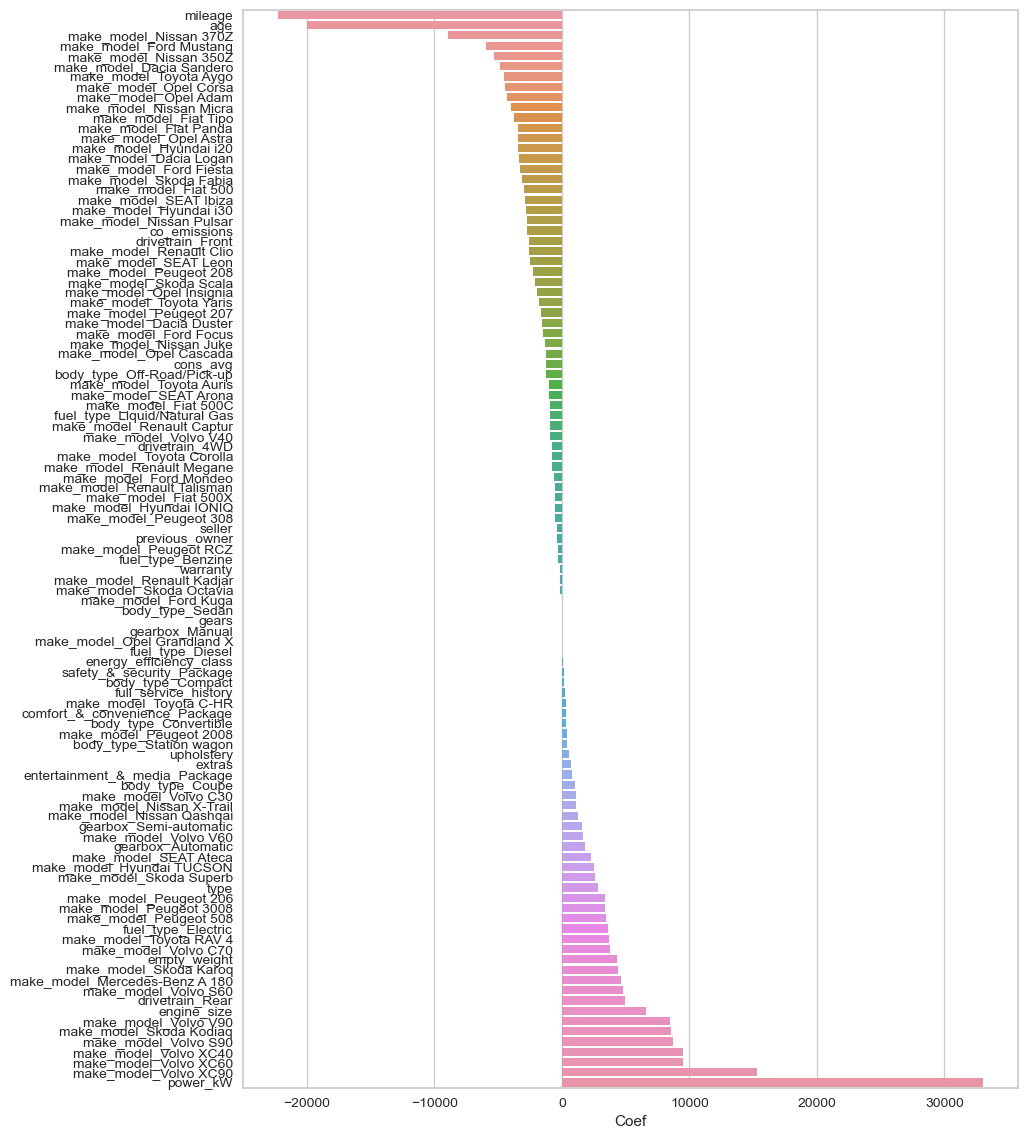

In [128]:
plt.figure(figsize=(10,14))
ax= sns.barplot(data= df_feat_imp, 
            x=df_feat_imp.Coef, 
            y=df_feat_imp.index)

In [129]:
lasso_grid_model.best_estimator_["Lasso"]

Lasso(alpha=0.001)

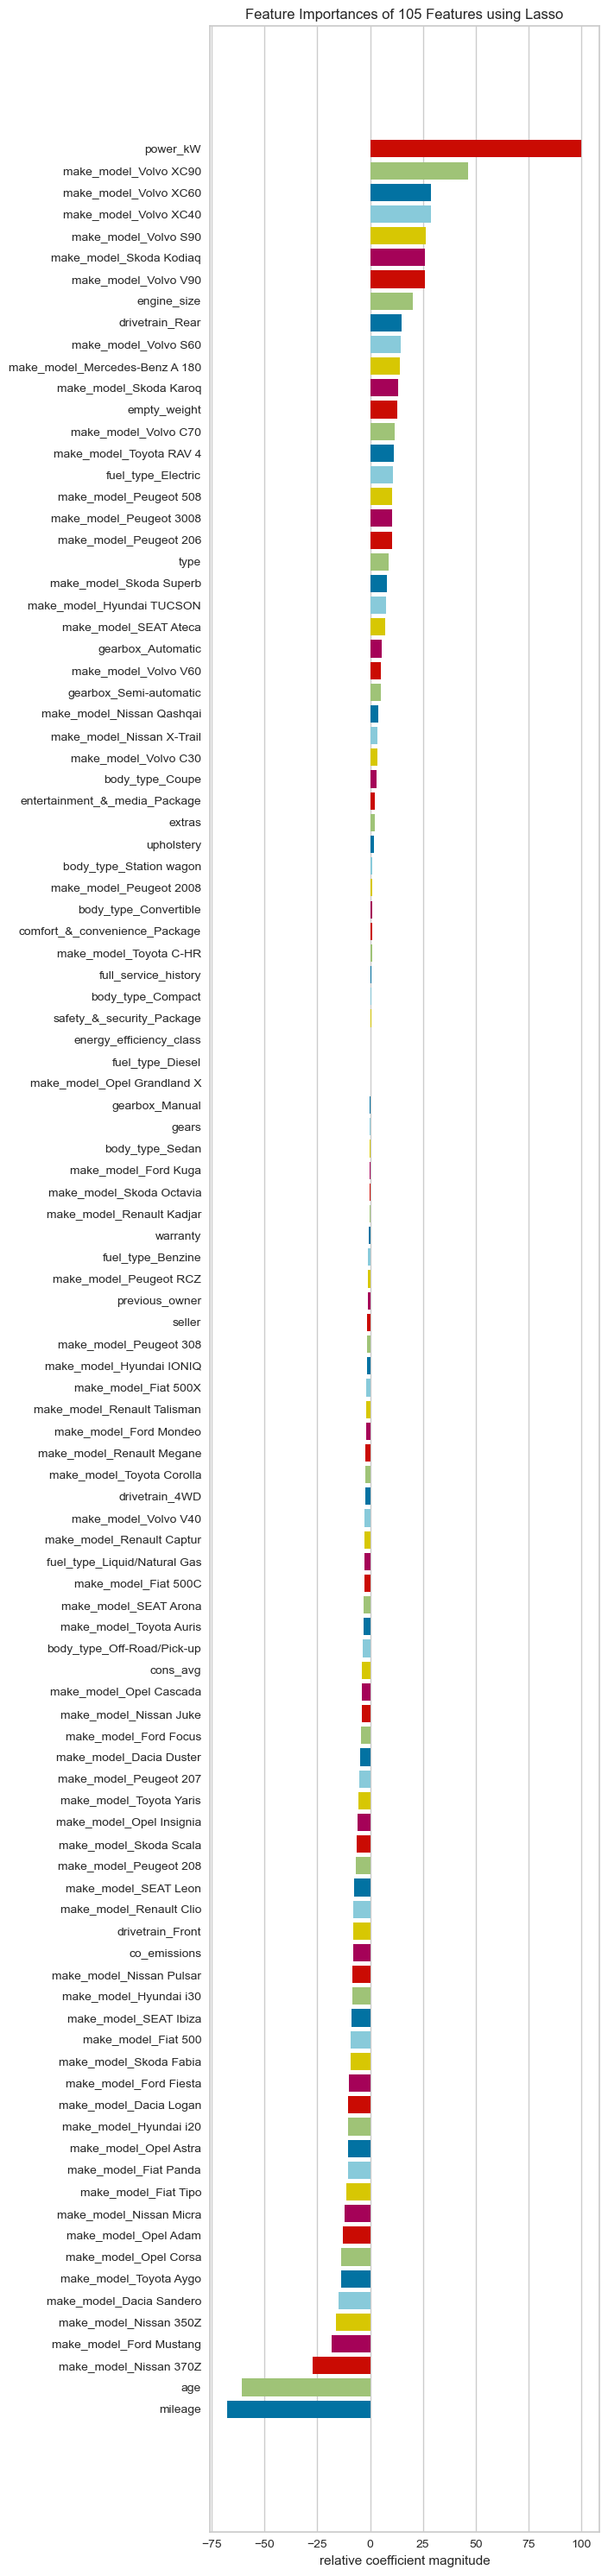

In [130]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = lasso_grid_model.best_estimator_["Lasso"] # Lasso(alpha=0.001)

viz = FeatureImportances(model, 
                         labels=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out())

visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show();


In [132]:
df_new = df[["make_model", "power_kW", "mileage","age", "engine_size", "type", "price"]]
df_new


,make_model,power_kW,mileage,age,engine_size,type,price
0,Mercedes-Benz A 180,85.000,27150.000,2.000,1461.000,Used,24400.000
2,Mercedes-Benz A 180,85.000,21734.000,2.000,1461.000,Used,29800.000
3,Mercedes-Benz A 180,80.000,172700.000,4.000,1461.000,Used,21000.000
4,Mercedes-Benz A 180,85.000,18989.000,2.000,1461.000,Used,26800.000
5,Mercedes-Benz A 180,100.000,25.000,1.000,1332.000,Pre-registered,32900.000
...,...,...,...,...,...,...,...
18190,Volvo S90,140.000,93757.000,4.000,1969.000,Used,27190.000
18191,Volvo S90,140.000,93757.000,4.000,1969.000,Used,27190.000
18192,Volvo V40,88.000,114000.000,4.000,1969.000,Used,13000.000
18194,Volvo S90,288.000,40345.000,3.000,1969.000,Used,37600.000


In [133]:
X = df_new.drop(columns = ["price"])
y = df_new.price


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
X_train.head()

,make_model,power_kW,mileage,age,engine_size,type
7674,SEAT Leon,213.000,35977.000,3.000,1984.000,Used
13227,Nissan Micra,66.000,74314.000,4.000,1461.000,Used
8532,Skoda Octavia,85.000,39563.000,3.000,999.000,Used
4458,Peugeot 508,147.000,80300.000,5.000,1997.000,Used
15437,Hyundai i30,100.000,24576.000,6.000,1591.000,Used


In [136]:
cat_onehot = ['make_model']
cat_ordinal = ['type']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
                                       (OrdinalEncoder(categories= [cat_for_type]), cat_ordinal),
                                        remainder='passthrough', #MinMaxScaler()
                                        verbose_feature_names_out=False) 

In [137]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]

lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.866,0.860
mae,2765.906,2680.129
mse,15773600.948,15221457.560
rmse,3971.599,3901.469


## Cross Validate

In [138]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10, 
                        return_train_score=True)

In [139]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.864
train_r2                                           0.866
test_neg_mean_absolute_error                   -2783.905
train_neg_mean_absolute_error                  -2765.010
test_neg_mean_squared_error                -15980582.065
train_neg_mean_squared_error               -15762787.916
test_neg_root_mean_squared_error               -3992.602
train_neg_root_mean_squared_error              -3970.176
test_neg_mean_absolute_percentage_error           -0.141
train_neg_mean_absolute_percentage_error          -0.140
dtype: float64

In [140]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = mean_squared_error(y_test, y_pred, squared=False)
fm_mape= mean_absolute_percentage_error(y_test, y_pred)

## 7. Visually Compare Models Performance In a Graph

In [141]:
compare = pd.DataFrame({"Model": ["linear_m","ridge_m", "lasso_m", "elastic_m", "final_m"],
                        "r2_score": [lm_R2, rm_R2, lasm_R2, em_R2, fm_R2],
                        "mae": [lm_mae, rm_mae, lasm_mae, em_mae, fm_mae],
                        "rmse": [lm_rmse, rm_rmse, lasm_rmse, em_rmse, fm_rmse],
                        "mape": [lm_mape, rm_mape, lasm_mape, em_mape, fm_mape]})
compare

,Model,r2_score,mae,rmse,mape
0,linear_m,0.876,2498.880,3673.752,0.131
1,ridge_m,0.876,2494.075,3667.646,0.130
2,lasso_m,0.876,2497.240,3667.657,0.131
3,elastic_m,0.876,2494.839,3667.543,0.131
4,final_m,0.860,2680.129,3901.469,0.140


In [142]:
compare.sort_values(by="r2_score", ascending=False)

,Model,r2_score,mae,rmse,mape
3,elastic_m,0.876,2494.839,3667.543,0.131
1,ridge_m,0.876,2494.075,3667.646,0.130
2,lasso_m,0.876,2497.240,3667.657,0.131
0,linear_m,0.876,2498.880,3673.752,0.131
4,final_m,0.860,2680.129,3901.469,0.140


In [143]:
compare.sort_values(by="mae", ascending=True)

,Model,r2_score,mae,rmse,mape
1,ridge_m,0.876,2494.075,3667.646,0.130
3,elastic_m,0.876,2494.839,3667.543,0.131
2,lasso_m,0.876,2497.240,3667.657,0.131
0,linear_m,0.876,2498.880,3673.752,0.131
4,final_m,0.860,2680.129,3901.469,0.140


## Prediction a new observation
- Create an observation and predict its price

In [144]:
X = df_new.drop(columns = ["price"])
y = df_new.price


In [145]:
X.head()

,make_model,power_kW,mileage,age,engine_size,type
0,Mercedes-Benz A 180,85.000,27150.000,2.000,1461.000,Used
2,Mercedes-Benz A 180,85.000,21734.000,2.000,1461.000,Used
3,Mercedes-Benz A 180,80.000,172700.000,4.000,1461.000,Used
4,Mercedes-Benz A 180,85.000,18989.000,2.000,1461.000,Used
5,Mercedes-Benz A 180,100.000,25.000,1.000,1332.000,Pre-registered


In [146]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]
final_model = Pipeline(steps=operations)

In [147]:
final_model.fit(X, y)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=0.001))])

In [148]:
my_dict = {
    "make_model": 'Mercedes-Benz A 180',
    "power_kW": 85,
    "mileage": 30000,
    "age": 3,
    "engine_size": 1461,
    "type": "Used"
}

In [149]:
X.head()

,make_model,power_kW,mileage,age,engine_size,type
0,Mercedes-Benz A 180,85.000,27150.000,2.000,1461.000,Used
2,Mercedes-Benz A 180,85.000,21734.000,2.000,1461.000,Used
3,Mercedes-Benz A 180,80.000,172700.000,4.000,1461.000,Used
4,Mercedes-Benz A 180,85.000,18989.000,2.000,1461.000,Used
5,Mercedes-Benz A 180,100.000,25.000,1.000,1332.000,Pre-registered


In [150]:
new_obs = pd.DataFrame([my_dict])
new_obs


,make_model,power_kW,mileage,age,engine_size,type
0,Mercedes-Benz A 180,85,30000,3,1461,Used


In [151]:
final_model.predict(new_obs)

array([27100.749921])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___